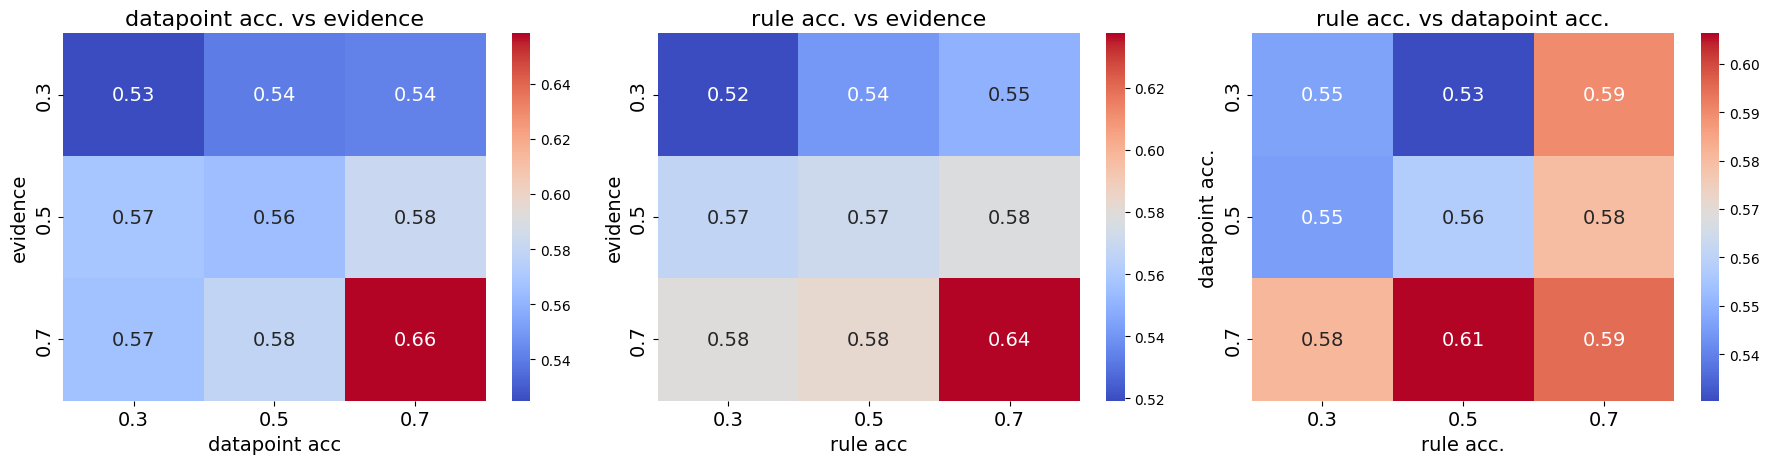

In [1]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load the dataset
df_new = pd.read_csv('df_solver_other_params_tweets.csv')

def create_pivot(data, x, y, z):
    pivot_table = data.pivot_table(index=y, columns=x, values=z, aggfunc=np.mean)
    return pivot_table

# Font size settings
title_fontsize = 16
label_fontsize = 14
tick_fontsize = 14
annot_fontsize = 14


# Adjust padding settings
# padding_top = 0.3 # Adjust this to add more space at the top
# padding_bottom = 0.25  # Adjust this to add more space at the bottom

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# fig.suptitle('Pairwise Interaction Heatmaps for New Global Accuracy (Tweets Dataset)', fontsize=16)

pivot1 = create_pivot(df_new, 'instance_acc_thresh', 'min_non_abstain_thresh', 'new_global_accuracy')
sns.heatmap(pivot1, annot=True, cmap="coolwarm", ax=axes[0], annot_kws={"size": annot_fontsize})
axes[0].set_title('datapoint acc. vs evidence', fontsize=title_fontsize)
axes[0].set_xlabel('datapoint acc', fontsize=label_fontsize)
axes[0].set_ylabel('evidence',fontsize=label_fontsize)
axes[0].tick_params(axis='both', labelsize=tick_fontsize)  # Set tick label size


pivot2 = create_pivot(df_new, 'lf_acc_thresh', 'min_non_abstain_thresh', 'new_global_accuracy')
sns.heatmap(pivot2, annot=True, cmap="coolwarm", ax=axes[1], annot_kws={"size": annot_fontsize})
axes[1].set_title('rule acc. vs evidence',fontsize=title_fontsize)
axes[1].set_xlabel('rule acc', fontsize=label_fontsize)
axes[1].set_ylabel('evidence',fontsize=label_fontsize)
axes[1].tick_params(axis='both', labelsize=tick_fontsize)  # Set tick label size

pivot3 = create_pivot(df_new, 'lf_acc_thresh', 'instance_acc_thresh', 'new_global_accuracy')
sns.heatmap(pivot3, annot=True, cmap="coolwarm", ax=axes[2], annot_kws={"size": annot_fontsize})
axes[2].set_title('rule acc. vs datapoint acc.', fontsize=title_fontsize)
axes[2].set_xlabel('rule acc.', fontsize=label_fontsize)
axes[2].set_ylabel('datapoint acc.', fontsize=label_fontsize)
axes[2].tick_params(axis='both', labelsize=tick_fontsize)  # Set tick label size

# plt.subplots_adjust(top=padding_top, bottom=padding_bottom)
fig.savefig('heatmaps.png', dpi=300)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

